In [1]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

# Comprobación de la práctica 1

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%cd ..

/home/esther/Escritorio/UAM/quinto


In [3]:
import string, random
import numpy as np
import pandas as pd
import sys

import networkx as nx

from sklearn.linear_model import LinearRegression

sys.path.append(r'/home/esther/Escritorio/UAM/quinto/DAALG')
import grafos02 as gr

# Basic Graph Functions

In [4]:
n_grafos = 10
n_nodes = 10 
sparse_factor = 0.37

print("\ncheck basic graph functions ....................")
print("\ncomprobamos la generación de grafos aleatorios ..........")
est_sp_f = gr.check_sparse_factor(n_grafos=n_grafos, n_nodes=n_nodes, sparse_factor=sparse_factor)
print("\n\testimated sp_f %5.2f sobre %d graphs with %d n_nodes and spars. fact. %5.2f" %  
      (est_sp_f, n_grafos, n_nodes, sparse_factor) )


check basic graph functions ....................

comprobamos la generación de grafos aleatorios ..........

	estimated sp_f  0.36 sobre 10 graphs with 10 n_nodes and spars. fact.  0.37


# Writing to and Reading fromTGF Files

In [5]:
print("\ngeneramos grafo TFG ..........")
m_g = gr.rand_matr_pos_graph(n_nodes=5, sparse_factor=0.75, max_weight=10.)    

print("\ncomprobamos las funciones de conversión ..........")
print("\ngrafo inicial\n", m_g)

d_g = gr.m_g_2_d_g(m_g)
print("\nfrom m to d\n", d_g)

m_g2 = gr.d_g_2_m_g(d_g)
print("\nfrom d to m\n", m_g2)

print("\nguardamos grafo en archivo ..........")
gr.print_d_g(d_g)

f_name = 'my_graph.tfg'
gr.d_g_2_TGF(d_g, f_name)

print("\ny leemos grafo de archivo ..........")
d_g2 = gr.TGF_2_d_g(f_name)
gr.print_d_g(d_g2)


generamos grafo TFG ..........

comprobamos las funciones de conversión ..........

grafo inicial
 [[  0.   9.   6.   4.   6.]
 [  6.   0.  inf   5.   7.]
 [  7.  inf   0.   4.   6.]
 [ 10.  inf  inf   0.   5.]
 [  6.  inf   3.   7.   0.]]

from m to d
 {0: {1: 9.0, 2: 6.0, 3: 4.0, 4: 6.0}, 1: {0: 6.0, 3: 5.0, 4: 7.0}, 2: {0: 7.0, 3: 4.0, 4: 6.0}, 3: {0: 10.0, 4: 5.0}, 4: {0: 6.0, 2: 3.0, 3: 7.0}}

from d to m
 [[  0.   9.   6.   4.   6.]
 [  6.   0.  inf   5.   7.]
 [  7.  inf   0.   4.   6.]
 [ 10.  inf  inf   0.   5.]
 [  6.  inf   3.   7.   0.]]

guardamos grafo en archivo ..........

graph_from_dict:

( 0 1 ) 9.0
( 0 2 ) 6.0
( 0 3 ) 4.0
( 0 4 ) 6.0
( 1 0 ) 6.0
( 1 3 ) 5.0
( 1 4 ) 7.0
( 2 0 ) 7.0
( 2 3 ) 4.0
( 2 4 ) 6.0
( 3 0 ) 10.0
( 3 4 ) 5.0
( 4 0 ) 6.0
( 4 2 ) 3.0
( 4 3 ) 7.0

y leemos grafo de archivo ..........

graph_from_dict:

( 0 1 ) 9.0
( 0 2 ) 6.0
( 0 3 ) 4.0
( 0 4 ) 6.0
( 1 0 ) 6.0
( 1 3 ) 5.0
( 1 4 ) 7.0
( 2 0 ) 7.0
( 2 3 ) 4.0
( 2 4 ) 6.0
( 3 0 ) 10.0
( 3 4 ) 5.0
( 

# Single Source Dijkstra

In [6]:
print("\nsingle source Dijkstra ....................")
print("\ncomprobamos la corrección de Dijkstra ..........")

print("\tgeneramos_grafo_aleatorio ..........")
m_g = gr.rand_matr_pos_graph(n_nodes=10, sparse_factor=0.75, max_weight=10.)    
d_g = gr.m_g_2_d_g(m_g)
nx_g = gr.d_g_2_nx_g(d_g)

l_difs = []
for u in d_g.keys():
    #print("\tcalculamos d y p mediante nuestro Dijkstra ..........")
    d, p = gr.dijkstra_d(d_g, u)
    
    #print("\ty mediante networkx ..........")
    d_n, p_n = nx.single_source_dijkstra(nx_g, u, weight='weight')
    
    print( "\n\tdistancias from %d:\n" % u,  d)
    print( "\n\tdistancias_nx from %d:\n" % u,  d_n)
    
    df   = pd.DataFrame.from_dict(d,   orient='index', columns=['dijks']).sort_index()
    df_n = pd.DataFrame.from_dict(d_n, orient='index', columns=['dijks']).sort_index()
    
    #l_difs: diferencias entre distancias Dijkstra y distancias con nx
    l_difs.append(abs(df['dijks'].values - df_n['dijks'].values).max())


single source Dijkstra ....................

comprobamos la corrección de Dijkstra ..........
	generamos_grafo_aleatorio ..........

	distancias from 0:
 {0: 0, 1: 8.0, 2: 6.0, 3: 9.0, 4: 8.0, 5: 7.0, 6: 7.0, 7: 8.0, 8: 4.0, 9: 10.0}

	distancias_nx from 0:
 {0: 0, 1: 8.0, 2: 6.0, 3: 9.0, 4: 8.0, 5: 7.0, 6: 7.0, 7: 8.0, 8: 4.0, 9: 10.0}

	distancias from 1:
 {0: 9.0, 1: 0, 2: 4.0, 3: 5.0, 4: 7.0, 5: 8.0, 6: 9.0, 7: 5.0, 8: 9.0, 9: 6.0}

	distancias_nx from 1:
 {0: 9.0, 1: 0, 2: 4.0, 3: 5.0, 4: 7.0, 5: 8.0, 6: 9.0, 7: 5.0, 8: 9.0, 9: 6.0}

	distancias from 2:
 {0: 7.0, 1: 7.0, 2: 0, 3: 4.0, 4: 3.0, 5: 7.0, 6: 11.0, 7: 7.0, 8: 7.0, 9: 9.0}

	distancias_nx from 2:
 {0: 7.0, 1: 7.0, 2: 0, 3: 4.0, 4: 3.0, 5: 7.0, 6: 11.0, 7: 7.0, 8: 7.0, 9: 9.0}

	distancias from 3:
 {0: 14.0, 1: 9.0, 2: 8.0, 3: 0, 4: 10.0, 5: 6.0, 6: 7.0, 7: 3.0, 8: 7.0, 9: 9.0}

	distancias_nx from 3:
 {0: 14.0, 1: 9.0, 2: 8.0, 3: 0, 4: 10.0, 5: 6.0, 6: 7.0, 7: 3.0, 8: 7.0, 9: 9.0}

	distancias from 4:
 {0: 5.0, 1: 4.0, 

In [7]:
print("\ncomprobamos que todas las distancias son iguales ..........")
print("dif_dist", abs(np.array(l_difs)).max())


comprobamos que todas las distancias son iguales ..........
dif_dist 0.0


In [8]:
mm = np.array([
[0, 1., 1., 1., np.inf, np.inf, np.inf],
[np.inf, 0., np.inf, 1., 1., np.inf, np.inf],
[np.inf, np.inf, 0., np.inf, np.inf, 1., np.inf],
[np.inf, np.inf, 1., 0., np.inf, 1., 1.],
[np.inf, np.inf, np.inf, 1., 0., np.inf, 1.],
[np.inf, np.inf, np.inf, np.inf, np.inf, 0., 1.],
[np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0.]    
])

dd = gr.m_g_2_d_g(mm)
d, p = gr.dijkstra_d(dd, 0)
gr.min_paths(p)

{0: [0],
 1: [0, 1],
 2: [0, 2],
 3: [0, 3],
 4: [0, 1, 4],
 5: [0, 2, 5],
 6: [0, 3, 6]}

# Time Plotting and Fitting

In [9]:
n_graphs = 20
n_nodes_ini = 10 
n_nodes_fin = 50
step = 5
sparse_factor = 0.8


ajuste de tiempos dijkstra ....................


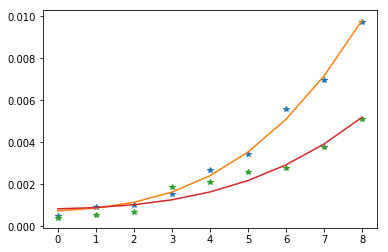

In [10]:
print("\najuste de tiempos dijkstra ....................")

l_t = gr.time_dijkstra_d(n_graphs, n_nodes_ini, n_nodes_fin, step, sparse_factor)
gr.fit_plot(l_t, gr.n2_log_n, size_ini=n_nodes_ini, size_fin=n_nodes_fin, step=step)    

l_t_nx = gr.time_dijkstra_nx(n_graphs, n_nodes_ini, n_nodes_fin, step, sparse_factor)
gr.fit_plot(l_t_nx, gr.n2_log_n, size_ini=n_nodes_ini, size_fin=n_nodes_fin, step=step)    